In [2]:
from PIL import Image

In [5]:
import numpy as np

In [140]:
from math import floor, log2

In [20]:
def change_to_halftone(image):
    width, height = image.size
    newImage = Image.new('P', (width, height))
    for x in range(width):
        for y in range(height):
            color = image.getpixel((x,y))
            bright = floor(0.3 * color[0] + 0.59 * color[1] +  0.11 *color[2])
            newImage.putpixel((x, y), bright)
    return newImage

In [114]:
image = Image.open("pictures/picture2.jpg")

In [115]:
image.show()

In [116]:
image = change_to_halftone(image)

In [117]:
image.show()

In [118]:
arr = np.zeros((256,256), dtype='uint32')

In [119]:
width, height = image.size

In [120]:
for x in range(width):
    for y in range(height):
        if (x != 0):
            arr[image.getpixel((x,y))][image.getpixel((x-1,y))]+=1
        if (x != width - 1):
            arr[image.getpixel((x,y))][image.getpixel((x+1,y))]+=1
        if (y != 0):
            arr[image.getpixel((x,y))][image.getpixel((x,y-1))]+=1
        if (y != height - 1):
            arr[image.getpixel((x,y))][image.getpixel((x,y+1))]+=1

In [121]:
matrix_image = Image.new('P', (256, 256))

In [122]:
data = matrix_image.load()

In [123]:
max_ = max([max(item) for item in arr])

In [124]:
for x in range(256):
    for y in range(256):
        data[x,y] = int((arr[x][y] * 255 / max_))

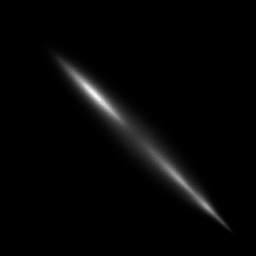

In [125]:
matrix_image


In [126]:
matrix_image.save("pictures/matrix_image2.bmp")

In [130]:
def energy(matrix):
    ASM = 0
    for x in range(256):
        for y in range(256):
            ASM += matrix[x][y] ** 2
    return ASM

In [132]:
ASM = energy(arr)

In [ ]:
max_probability(matrix):
    MPR = 

In [134]:
K = 4 * width * height - 2 * (width + height)

In [135]:
K

4910720

In [136]:
arr = np.zeros((256,256), dtype='float')

In [137]:
for x in range(width):
    for y in range(height):
        if (x != 0):
            arr[image.getpixel((x,y))][image.getpixel((x-1,y))]+=1
        if (x != width - 1):
            arr[image.getpixel((x,y))][image.getpixel((x+1,y))]+=1
        if (y != 0):
            arr[image.getpixel((x,y))][image.getpixel((x,y-1))]+=1
        if (y != height - 1):
            arr[image.getpixel((x,y))][image.getpixel((x,y+1))]+=1

In [138]:
for x in range(256):
    for y in range(256):
        arr[x][y] /= K

In [139]:
def max_probability(matrix):
    return max([max(item) for item in matrix])

In [156]:
def entropy(matrix):
    ENT = 0
    for x in range(256):
        for y in range(256):
            if (matrix[x][y] > 0):
                ENT += matrix[x][y] * log2(matrix[x][y])
    return -ENT

In [160]:
def trace(matrix):
    return np.trace(matrix)

In [166]:
def get_matrix_image(image):
    new_image = change_to_halftone(image)
    arr = np.zeros((256,256), dtype='uint32')
    width, height = new_image.size
    for x in range(width):
        for y in range(height):
            if (x != 0):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x-1,y))]+=1
            if (x != width - 1):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x+1,y))]+=1
            if (y != 0):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x,y-1))]+=1
            if (y != height - 1):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x,y+1))]+=1
    matrix_image = Image.new('P', (256, 256))
    data = matrix_image.load()
    max_ = max([max(item) for item in arr])
    for x in range(256):
        for y in range(256):
            data[x,y] = int((arr[x][y] * 255 / max_))
    return matrix_image

In [167]:
def get_signs(image):
    new_image = change_to_halftone(image)
    arr = np.zeros((256,256), dtype='float')
    width, height = new_image.size
    for x in range(width):
        for y in range(height):
            if (x != 0):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x-1,y))]+=1
            if (x != width - 1):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x+1,y))]+=1
            if (y != 0):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x,y-1))]+=1
            if (y != height - 1):
                arr[new_image.getpixel((x,y))][new_image.getpixel((x,y+1))]+=1
    K = 4 * width * height - 2 * (width + height)
    for x in range(256):
        for y in range(256):
            arr[x][y] /= K
    return (energy(arr), max_probability(arr), entropy(arr), trace(arr))

In [172]:
image = Image.open("pictures/picture4.jpg")

In [173]:
matrix_image = get_matrix_image(image)

In [174]:
matrix_image.save("pictures/matrix_image4.bmp")

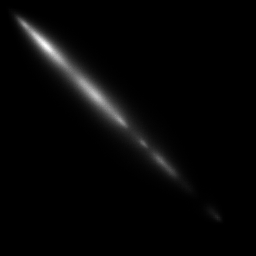

In [175]:
matrix_image

In [182]:
image = Image.open("pictures/picture4.jpg")

In [183]:
get_signs(image)

(0.00021065387792537093,
 0.0006004499574364588,
 12.781654402756233,
 0.051173537638331504)